In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import regex as re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
import os
def get_hashtags_text(x):
    if pd.notna(x) and 'hashtags' in x and x['hashtags']:
        hashtags = x['hashtags']
        hashtags_text = [ht['text'] for ht in hashtags]
        return hashtags_text
    else:
        return None

def get_urls(x):
    if pd.notna(x) and 'urls' in x and x['urls']:
        return True
    return False


def get_user_location(x):
    if pd.notna(x) and 'location' in x:
        return x['location']
    else:
        return None


def load_json(file_path):
    df_new = pd.DataFrame()

    try:
        # Leer el archivo JSON línea por línea y cargar los datos en una lista
        datos_json = []
        with open(file_path, "r", encoding="utf-8") as f:
            for line in f:
                data = json.loads(line)
                if 'retweeted_status' in data and data['retweeted_status'] != None:
                    data = data['retweeted_status']
                datos_json.append(data)

        df = pd.DataFrame(datos_json)

        df_new['id'] = df['id']
        df_new['lang'] = df['lang']
        df_new['text'] = df['text']
        df_new['favorite_count'] = df['favorite_count']
        df_new['retweet_count'] = df['retweet_count']
        df_new['possibly_sensitive'] = df['possibly_sensitive']
        df_new['created_at'] = df['created_at']
        df_new['is_quote_status'] = df['is_quote_status']
        df_new['entities_hashtags_text'] = df['entities'].apply(get_hashtags_text)
        df_new['entities_urls'] = df['entities'].apply(get_urls)
        df_new['user_location'] = df['user'].apply(get_user_location)
        
        # Asignar 0 a las columnas 'reply_count' y 'quote_count' si no existen
        df_new['reply_count'] = df.get('reply_count', 0)
        df_new['quote_count'] = df.get('quote_count', 0)

        # Verificar si hay al menos una imagen en el JSON
        has_image = []
        for i in range(len(df)):
            try:
                extended_entities = df['extended_entities'][i]
                if 'media' in extended_entities and len(extended_entities['media']) > 0:
                    has_image.append(True)
                else:
                    has_image.append(False)
            except (KeyError, TypeError):
                has_image.append(False)

        df_new['has_image'] = has_image

    except Exception as e:
        print(f'Se produjo una excepción: {e}')

    # Retornar el DataFrame resultante
    return df_new


def load_jsons_from_folder(folder_path):
    df_all = pd.DataFrame()

    try:
        # Obtener la lista de archivos en la carpeta
        json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

        for file_name in json_files:
            file_path = os.path.join(folder_path, file_name)
            df = load_json(file_path)

            # Extraer el nombre del archivo sin "_final_data.json"
            json_name = file_name.replace('_final_data.json', '')

            # Agregar columna con el nombre del JSON
            df['json_name'] = json_name

            # Concatenar el DataFrame al DataFrame total
            df_all = pd.concat([df_all, df], ignore_index=True)

    except Exception as e:
        print(f'Se produjo una excepción: {e}')

    # Retornar el DataFrame resultante
    return df_all

def read_tsv_folder(folder_path):
    df_combined = pd.DataFrame()  # DataFrame combinado para almacenar los datos de todos los archivos TSV

    # Obtener la lista de archivos en la carpeta
    file_list = os.listdir(folder_path)

    # Leer cada archivo TSV y combinar los datos en el DataFrame combinado
    for file_name in file_list:
        if file_name.endswith(".tsv"):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path, sep="\t")
            df_combined = pd.concat([df_combined, df], ignore_index=True)

    return df_combined


In [30]:
irma_json = load_json("RDATA/CrisisMMD_v2.0/json/iraq_iran_earthquake_final_data.json")
irma_tsv = pd.read_table("RDATA/CrisisMMD_v2.0/annotations/iraq_iran_earthquake_final_data.tsv")
harvey_json = load_json("RDATA/CrisisMMD_v2.0/json/hurricane_harvey_final_data.json")
irma_json.T

,0,1,2,3,4,5,6,7,8,9,...,486,487,488,489,490,491,492,493,494,495
id,929945093804617729,929977545260523520,929988832623316993,929896865776259072,929989459453595648,929989477828911104,929966930508775424,929989549895438336,929978536340938754,929989743810576384,...,931664033299738625,931691151236780037,931771549685899264,931789781087981568,931824949509140480,931880697752567808,931898198569996288,931925410224529410,932000082072948736,932027639589507072
lang,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,en,en,en,en,en
text,UPDATE:\nDeath toll from Iran’s quake rises to...,We pray for all those affected by the earthqua...,JUST IN: Death toll reaches 328 in Iran earthq...,A magnitude 7.2 earthquake struck northern Ira...,Video: 7.2-magnitude earthquake jolts #Iran-Ir...,#BREAKING: Iran earthquake toll rises to 328 d...,Iran-Iraq border earthquake latest:\n- At leas...,WSJ: Earthquake near Iran-Iraq border kills mo...,Hundreds dead after powerful #earthquake hits ...,Turkey rushes to help Iraq earthquake victims ...,...,@PeterHarley20 @Su39frogfoot @planesonthenet @...,The 2017 Iran-Iraq Earthquake from Sentinel-1....,Less than 24 hours after the earthquake hit #I...,"14 min.ago #earthquake 3.8 has hit Kerman, Ira...",IOC voices readiness to help earthquake-affect...,Damage proxy maps of 5 cities near the epicent...,#Iran Daily: US Treasury Blocks Donations for ...,#Kurdish children's situation after the #earth...,#IRAN'S #EARTHQUAKE EXPOSES #POLITICAL RIFTS A...,Victims of last week's earthquake gather outdo...
favorite_count,10,5,5,2,0,0,61,0,24,0,...,0,0,0,0,0,0,0,0,0,0
retweet_count,23,5,10,3,0,0,121,0,31,0,...,0,0,0,0,0,0,0,0,0,0
possibly_sensitive,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
created_at,Mon Nov 13 05:32:42 +0000 2017,Mon Nov 13 07:41:39 +0000 2017,Mon Nov 13 08:26:30 +0000 2017,Mon Nov 13 02:21:04 +0000 2017,Mon Nov 13 08:29:00 +0000 2017,Mon Nov 13 08:29:04 +0000 2017,Mon Nov 13 06:59:28 +0000 2017,Mon Nov 13 08:29:21 +0000 2017,Mon Nov 13 07:45:35 +0000 2017,Mon Nov 13 08:30:07 +0000 2017,...,Fri Nov 17 23:23:09 +0000 2017,Sat Nov 18 01:10:55 +0000 2017,Sat Nov 18 06:30:23 +0000 2017,Sat Nov 18 07:42:50 +0000 2017,Sat Nov 18 10:02:35 +0000 2017,Sat Nov 18 13:44:06 +0000 2017,Sat Nov 18 14:53:39 +0000 2017,Sat Nov 18 16:41:46 +0000 2017,Sat Nov 18 21:38:29 +0000 2017,Sat Nov 18 23:28:00 +0000 2017
is_quote_status,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
entities_hashtags_text,[earthquake],None,None,[Iraq],[Iran],[BREAKING],None,None,[earthquake],None,...,None,None,"[Iraq, NiliMajumder]",[earthquake],None,"[Kermanshah, Iran]",[Iran],"[Kurdish, earthquake, Iran]","[IRAN, EARTHQUAKE, POLITICAL, GOVERNANCE]",[Iran]
entities_urls,False,False,False,False,True,False,True,True,True,True,...,False,False,False,True,True,False,True,False,True,False


In [38]:
# Filtrar las filas sin imágenes
#df_without_images = harvey_json.loc[harvey_json['has_image'] == 0]
#df_without_images

df_json = load_jsons_from_folder("RDATA/CrisisMMD_v2.0/json")
df_tsv = read_tsv_folder("RDATA/CrisisMMD_v2.0/annotations")

df_tsv

,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path
0,917791044158185473,917791044158185473_0,informative,1.0000,informative,0.6766,other_relevant_information,1.0000,other_relevant_information,0.6766,NaN,NaN,RT @Gizmodo: Wildfires raging through Northern...,http://pbs.twimg.com/media/DLyi_WYVYAApwNg.jpg,data_image/california_wildfires/10_10_2017/917...
1,917791130590183424,917791130590183424_0,informative,1.0000,informative,0.6667,infrastructure_and_utility_damage,1.0000,affected_individuals,0.6667,NaN,NaN,PHOTOS: Deadly wildfires rage in California ht...,http://pbs.twimg.com/media/DLymKm9UMAAu0qw.jpg,data_image/california_wildfires/10_10_2017/917...
2,917791291823591425,917791291823591425_0,informative,0.6813,informative,1.0000,other_relevant_information,0.6813,infrastructure_and_utility_damage,1.0000,severe_damage,1.0,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,http://pbs.twimg.com/media/DLudaaZV4AAjT7x.jpg,data_image/california_wildfires/10_10_2017/917...
3,917791291823591425,917791291823591425_1,informative,0.6813,not_informative,1.0000,other_relevant_information,0.6813,not_humanitarian,1.0000,NaN,NaN,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,http://pbs.twimg.com/media/DLudaZXUMAABAEZ.jpg,data_image/california_wildfires/10_10_2017/917...
4,917792092100988929,917792092100988929_0,informative,0.6727,informative,0.6612,other_relevant_information,0.6727,infrastructure_and_utility_damage,0.6612,severe_damage,1.0,RT @TIME: California's raging wildfires as you...,http://pbs.twimg.com/media/DLwNe-NXUAE0XCw.jpg,data_image/california_wildfires/10_10_2017/917...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18077,881714673157980160,881714673157980160_0,not_informative,1.0000,not_informative,1.0000,not_humanitarian,1.0000,not_humanitarian,1.0000,NaN,NaN,Get to mora and try the whole menu https://t.c...,http://pbs.twimg.com/media/DDx60UAUAAAEGIX.jpg,data_image/srilanka_floods/3_7_2017/8817146731...
18078,881749861871362049,881749861871362049_0,not_informative,1.0000,not_informative,1.0000,not_humanitarian,1.0000,not_humanitarian,1.0000,NaN,NaN,"Mirka Mora (b.1928), noted French-born Austral...",http://pbs.twimg.com/media/DDyavFaWAAEaCuE.jpg,data_image/srilanka_floods/3_7_2017/8817498618...
18079,881770990556131328,881770990556131328_0,not_informative,1.0000,not_informative,1.0000,not_humanitarian,1.0000,not_humanitarian,1.0000,NaN,NaN,"@PaulMalignaggi Lol What u on about, Sergio Mo...",http://pbs.twimg.com/media/DDyuCVoXcAAlfXa.jpg,data_image/srilanka_floods/3_7_2017/8817709905...
18080,881807298930368513,881807298930368513_0,not_informative,0.5056,informative,0.6158,not_humanitarian,0.5056,rescue_volunteering_or_donation_effort,0.6158,NaN,NaN,#Cameroon : 4 #female suicide #Bombers kill 1 ...,http://pbs.twimg.com/media/DDzPED3XgAAynDG.jpg,data_image/srilanka_floods/3_7_2017/8818072989...


In [41]:
df_json

,id,lang,text,favorite_count,retweet_count,possibly_sensitive,created_at,is_quote_status,entities_hashtags_text,entities_urls,user_location,reply_count,quote_count,has_image,json_name
0,917791130590183424,en,PHOTOS: Deadly wildfires rage in California ht...,0,0,False,Tue Oct 10 16:37:11 +0000 2017,False,None,True,"Portland, Maine",0.0,0.0,True,california_wildfires
1,917787635946524674,en,Wildfires raging through Northern California a...,7,5,False,Tue Oct 10 16:23:18 +0000 2017,False,None,True,None,0.0,4.0,True,california_wildfires
2,917500054742605829,en,"PLS SHARE: We’re capturing wildfire response, ...",289,479,False,Mon Oct 09 21:20:34 +0000 2017,False,None,True,"Sacramento, California",9.0,25.0,True,california_wildfires
3,917623252264062976,en,California's raging wildfires as you've never ...,228,216,False,Tue Oct 10 05:30:06 +0000 2017,False,None,True,None,19.0,18.0,True,california_wildfires
4,917792930315821057,en,Mass Evacuations in California as Wildfires Ki...,0,0,False,Tue Oct 10 16:44:21 +0000 2017,False,[CaliforniaWildfires],True,www.facebook.com/doctorreefer/,0.0,0.0,True,california_wildfires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,881714673157980160,en,Get to mora and try the whole menu https://t.c...,0,0,False,Mon Jul 03 03:22:14 +0000 2017,False,None,False,"Arizona, USA",0.0,0.0,True,srilanka_floods
16053,881749861871362049,en,"Mirka Mora (b.1928), noted French-born Austral...",0,0,False,Mon Jul 03 05:42:03 +0000 2017,False,[womensart],False,None,0.0,0.0,True,srilanka_floods
16054,881770990556131328,en,"@PaulMalignaggi Lol What u on about, Sergio Mo...",0,0,False,Mon Jul 03 07:06:01 +0000 2017,False,None,False,None,0.0,0.0,True,srilanka_floods
16055,881807298930368513,en,#Cameroon : 4 #female suicide #Bombers kill 1 ...,0,0,False,Mon Jul 03 09:30:17 +0000 2017,False,"[Cameroon, female, Bombers]",True,Cameroon,0.0,0.0,True,srilanka_floods


In [57]:
df = pd.merge(df_json, df_tsv[['tweet_id', 'text_info', 'text_info_conf', 'text_human', 'text_human_conf']],
                    left_on='id', right_on='tweet_id', how='left')
df.drop('tweet_id',axis=1,inplace=True)

df.T



,0,1,2,3,4,5,6,7,8,9,...,17622,17623,17624,17625,17626,17627,17628,17629,17630,17631
id,917791130590183424,917787635946524674,917500054742605829,917623252264062976,917792930315821057,917792147700465664,917715928271507456,917794232160661505,917433167014920192,917793736918216706,...,881612317317836800,881612317317836800,881612317317836800,881612317317836800,881632991776301056,881714673157980160,881749861871362049,881770990556131328,881807298930368513,869578299487404032
lang,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,en,en,en,en,en
text,PHOTOS: Deadly wildfires rage in California ht...,Wildfires raging through Northern California a...,"PLS SHARE: We’re capturing wildfire response, ...",California's raging wildfires as you've never ...,Mass Evacuations in California as Wildfires Ki...,Wildfires Threaten California’s First Legal Ca...,Southern California fire shrouds Disneyland An...,At Least 11 Dead and 100 Missing as Wildfires ...,California wildfires destroy more than 50 stru...,California wildfire. ὡ4 https://t.co/a8oD5rkDdI,...,"Mora, Lakin, Immaris, and our DM are officiall...","Mora, Lakin, Immaris, and our DM are officiall...","Mora, Lakin, Immaris, and our DM are officiall...","Mora, Lakin, Immaris, and our DM are officiall...",https://t.co/7VqAlUWTUO My #wine tip for this ...,Get to mora and try the whole menu https://t.c...,"Mirka Mora (b.1928), noted French-born Austral...","@PaulMalignaggi Lol What u on about, Sergio Mo...",#Cameroon : 4 #female suicide #Bombers kill 1 ...,it happened during the visit of #CycloneMora o...
favorite_count,0,7,289,228,0,0,133,0,1,0,...,0,0,0,0,0,0,0,0,0,0
retweet_count,0,5,479,216,0,0,76,0,2,0,...,0,0,0,0,0,0,0,0,0,1
possibly_sensitive,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
created_at,Tue Oct 10 16:37:11 +0000 2017,Tue Oct 10 16:23:18 +0000 2017,Mon Oct 09 21:20:34 +0000 2017,Tue Oct 10 05:30:06 +0000 2017,Tue Oct 10 16:44:21 +0000 2017,Tue Oct 10 16:41:14 +0000 2017,Tue Oct 10 11:38:22 +0000 2017,Tue Oct 10 16:49:31 +0000 2017,Mon Oct 09 16:54:46 +0000 2017,Tue Oct 10 16:47:33 +0000 2017,...,Sun Jul 02 20:35:30 +0000 2017,Sun Jul 02 20:35:30 +0000 2017,Sun Jul 02 20:35:30 +0000 2017,Sun Jul 02 20:35:30 +0000 2017,Sun Jul 02 21:57:39 +0000 2017,Mon Jul 03 03:22:14 +0000 2017,Mon Jul 03 05:42:03 +0000 2017,Mon Jul 03 07:06:01 +0000 2017,Mon Jul 03 09:30:17 +0000 2017,Tue May 30 15:36:37 +0000 2017
is_quote_status,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
entities_hashtags_text,None,None,None,None,[CaliforniaWildfires],None,None,None,[KAKEnews],None,...,None,None,None,None,"[wine, weekend]",None,[womensart],None,"[Cameroon, female, Bombers]",[CycloneMora]
entities_urls,True,True,True,True,True,True,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [45]:
summary = df.describe()
summary

,id,favorite_count,retweet_count,reply_count,quote_count,text_info_conf,text_human_conf
count,1.763200e+04,17632.000000,17632.000000,17297.000000,17298.000000,15477.000000,15477.000000
mean,9.100900e+17,35.474705,18.285163,1.372030,2.174066,0.798199,0.798199
std,1.449971e+16,799.756700,439.485524,35.081692,56.789295,0.201253,0.201253
min,4.855547e+17,0.000000,0.000000,0.000000,0.000000,0.257800,0.257800
25%,9.068259e+17,0.000000,0.000000,0.000000,0.000000,0.660800,0.660800
50%,9.101124e+17,0.000000,0.000000,0.000000,0.000000,0.708800,0.708800
75%,9.159862e+17,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.320276e+17,51726.000000,36840.000000,3797.000000,4010.000000,1.000000,1.000000


In [47]:
# select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# select only non-numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

boolean_columns = df.select_dtypes(include=['bool']).columns.tolist()

print(numerical_columns)

print(categorical_columns)

print(boolean_columns)

['id', 'favorite_count', 'retweet_count', 'reply_count', 'quote_count', 'text_info_conf', 'text_human_conf']
['lang', 'text', 'created_at', 'is_quote_status', 'entities_hashtags_text', 'user_location', 'json_name', 'text_info', 'text_human']
['possibly_sensitive', 'entities_urls', 'has_image']


### Se revisa si hay ids repetidos

In [52]:
print(df["id"].shape)
df["id"].value_counts()

(16054,)


id
917791130590183424    1
913192315094814720    1
913171455919173632    1
913172002810105856    1
913172197660876800    1
                     ..
909869734216257544    1
909871885780955137    1
909873652493160448    1
909878480212340736    1
869578299487404032    1
Name: count, Length: 16054, dtype: int64

In [63]:
df = df.drop_duplicates(subset=['id']).reset_index(drop=True)
print(df.shape)
df["id"].value_counts()

(16054, 19)


id
917791130590183424    1
913192315094814720    1
913171455919173632    1
913172002810105856    1
913172197660876800    1
                     ..
909869734216257544    1
909871885780955137    1
909873652493160448    1
909878480212340736    1
869578299487404032    1
Name: count, Length: 16054, dtype: int64

Con los datos no duplicados, se revisa la variedad de ciertas columnas. Si estás columnas solo retornan un único valor, se eliminan por redundancia.


In [59]:
language = df["lang"]

wa = []

for i in language:
    if i not in wa:
        wa.append(i)

print(wa)

['en']


### Contando valores 

In [93]:


count_retweet_not_zero = len(df[(df['retweet_count'] >= 1)])
count_favorite_not_zero = len(df[(df['favorite_count'] >= 1)])
reply_counts = len(df[(df['reply_count'] >= 1)])
quote_counts = len(df[(df['quote_count'] >= 1)])

# Contar la cantidad de tweets con retweet_count igual a 0
count_retweet_zero = len(df[df['retweet_count'] == 0])

# Contar la cantidad de tweets con favorite_count igual a 0
count_favorite_zero = len(df[df['favorite_count'] == 0])

# Contar la cantidad de tweets con reply counts = 0
reply_counts_zero = len(df[df['reply_count'] == 0])

# Contar la cantidad de tweets con reply counts = 0
quote_counts_zero = len(df[df['quote_count'] == 0])

# Contar la cantidad de tweets con is_quote_status = True
count_quote_true = len(df[df['is_quote_status'] == True])

# Contar la cantidad de tweets con is_quote_status = False
count_quote_false = len(df[df['is_quote_status'] == False])

# Contar la cantidad de tweets con possibly_sensitive = True
count_sensitive_true = len(df[df['possibly_sensitive'] == True])

# Contar la cantidad de tweets con possibly_sensitive = False
count_sensitive_false = len(df[df['possibly_sensitive'] == False])

print("Cantidad de tweets con retweet_count > 1:", count_retweet_not_zero)
print("Cantidad de tweets sin retweet_count:", count_retweet_zero)
print("Cantidad de tweets con favorite_count > 1:", count_favorite_not_zero)
print("Cantidad de tweets sin favorite_count:", count_favorite_zero)
print("Cantidad de tweets con reply_count > 1:", reply_counts)
print("Cantidad de tweets sin reply_count:", reply_counts_zero)
print("Cantidad de tweets con quote_count > 1:", quote_counts)
print("Cantidad de tweets sin quote_count:", quote_counts_zero)
print("Cantidad de tweets con is_quote_status = True:", count_quote_true)
print("Cantidad de tweets con is_quote_status = False:", count_quote_false)
print("Cantidad de tweets con possibly_sensitive = True:", count_sensitive_true)
print("Cantidad de tweets con possibly_sensitive = False:", count_sensitive_false)

print("")
print(f"Hay un {round((count_retweet_zero / (count_retweet_zero+count_retweet_not_zero))*100,2)} % de los tweets sin favoritos")
print(f"Hay un {round((count_favorite_zero / (count_favorite_zero+count_favorite_not_zero)) *100,2)} % de los tweets sin RTs")
print(f"Hay un {round((reply_counts_zero / (reply_counts_zero+reply_counts))*100,2)} % de los tweets sin respuestas(?)")
print(f"Hay un {round((quote_counts_zero / (quote_counts_zero+quote_counts)) *100,2)} % de los tweets sin citados")
print(f"Hay un {round((count_quote_false / (count_quote_false+count_quote_true))*100,2)} % de los tweets no citados")
print(f"Hay un {round((count_sensitive_false / (count_sensitive_false+count_sensitive_true)) *100,2)} % de los tweets no sensibles")


Cantidad de tweets con retweet_count > 1: 2156
Cantidad de tweets sin retweet_count: 13898
Cantidad de tweets con favorite_count > 1: 1801
Cantidad de tweets sin favorite_count: 14253
Cantidad de tweets con reply_count > 1: 898
Cantidad de tweets sin reply_count: 14843
Cantidad de tweets con quote_count > 1: 890
Cantidad de tweets sin quote_count: 14852
Cantidad de tweets con is_quote_status = True: 91
Cantidad de tweets con is_quote_status = False: 15962
Cantidad de tweets con possibly_sensitive = True: 123
Cantidad de tweets con possibly_sensitive = False: 15931

Hay un 86.57 % de los tweets sin favoritos
Hay un 88.78 % de los tweets sin RTs
Hay un 94.3 % de los tweets sin respuestas(?)
Hay un 94.35 % de los tweets sin citados
Hay un 99.43 % de los tweets no citados
Hay un 99.23 % de los tweets no sensibles


        quote_count  favorite_count   reply_count  retweet_count
count  15742.000000    16054.000000  15741.000000   16054.000000
mean       2.382289       38.927432      1.495077      20.068394
std       59.520268      838.053529     36.741021     460.538239
min        0.000000        0.000000      0.000000       0.000000
25%        0.000000        0.000000      0.000000       0.000000
50%        0.000000        0.000000      0.000000       0.000000
75%        0.000000        0.000000      0.000000       0.000000
max     4010.000000    51726.000000   3797.000000   36840.000000


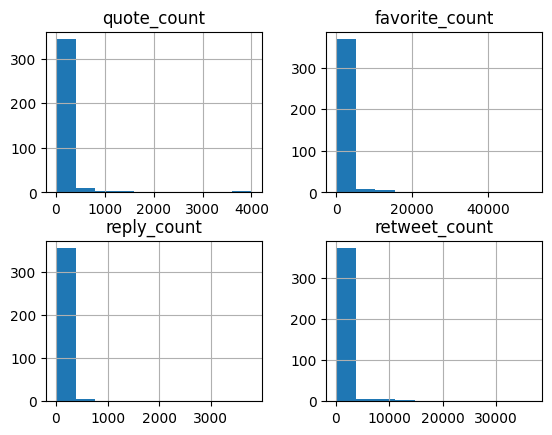

In [94]:
def hist_interaction(df):
    print(df[['quote_count', 'favorite_count', 'reply_count', 'retweet_count']].describe())
    new_df = df[df['retweet_count'] > 50]
    new_df[['quote_count', 'favorite_count', 'reply_count', 'retweet_count']].hist()

hist_interaction(df)

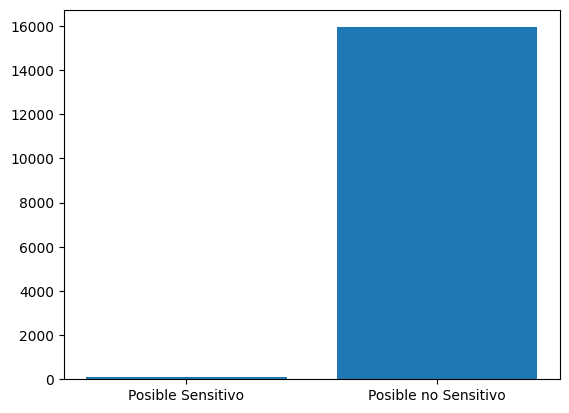

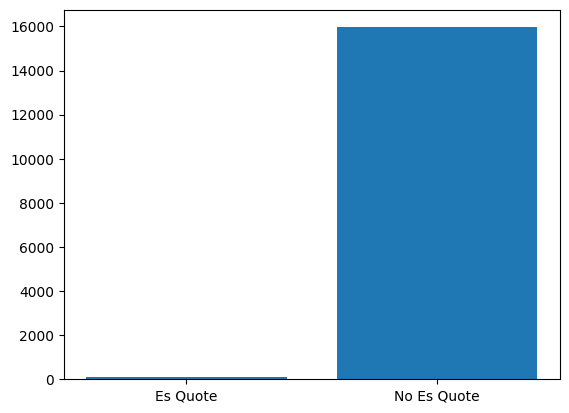

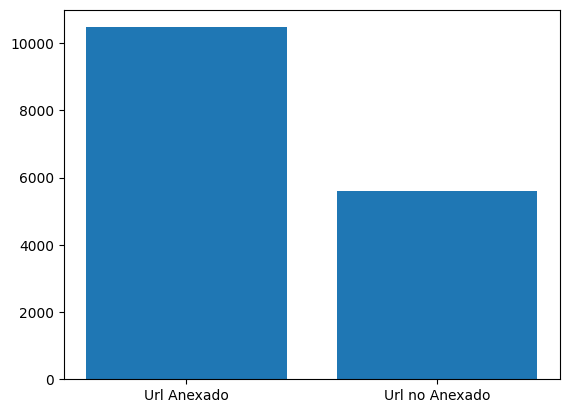

In [95]:
def count_booleans(df):
    valores_T = 0
    valores_F = 0
    quoteable = 0
    not_quotable = 0
    url = 0
    urlnt = 0

    for i in range(df.shape[0]):
        if df["possibly_sensitive"][i]:
            valores_T +=1
        else:
            valores_F +=1

        if df["is_quote_status"][i]:
            quoteable += 1
        else:
            not_quotable += 1        

        if df["entities_urls"][i]:
            url += 1
        else:
            urlnt += 1

    plt.bar(["Posible Sensitivo","Posible no Sensitivo"],[valores_T, valores_F])
    plt.show()

    plt.bar(["Es Quote","No Es Quote"],[quoteable, not_quotable])
    plt.show()

    plt.bar(["Url Anexado","Url no Anexado"],[url, urlnt])
    plt.show()

count_booleans(df)

Se procede a analizar los tweets si son informativos y si son humanitarios. Se separan en grupos según el valor 'conf'. Si 'conf' es 1, se grafican los valores como tal. Si 'conf' es menor a 1, se gráfica junto al promedio de conf.


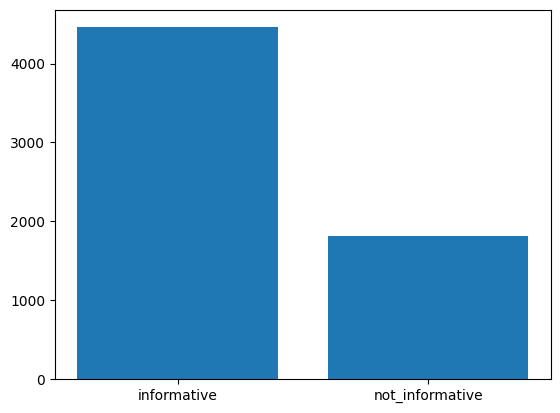

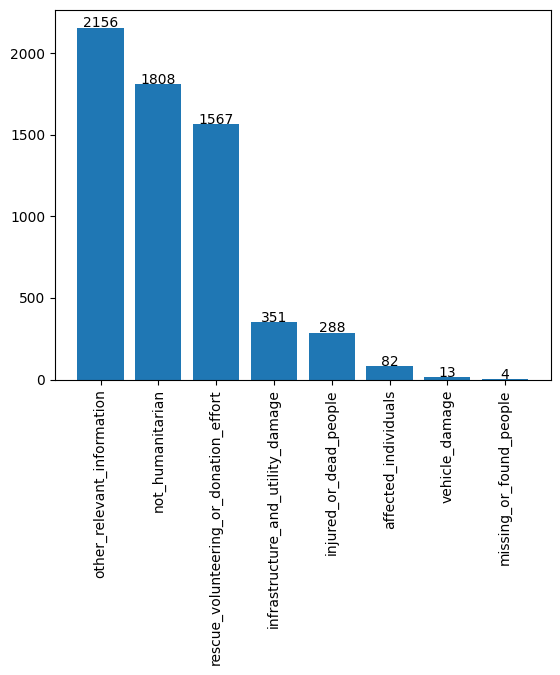

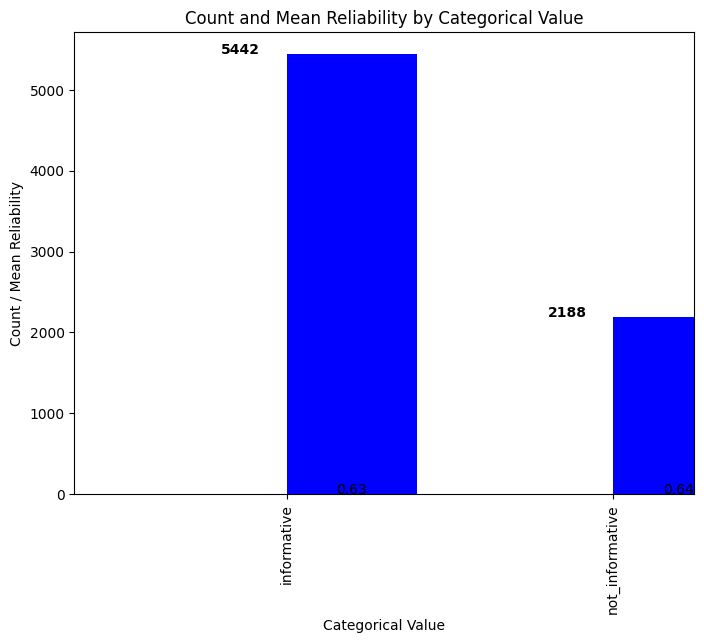

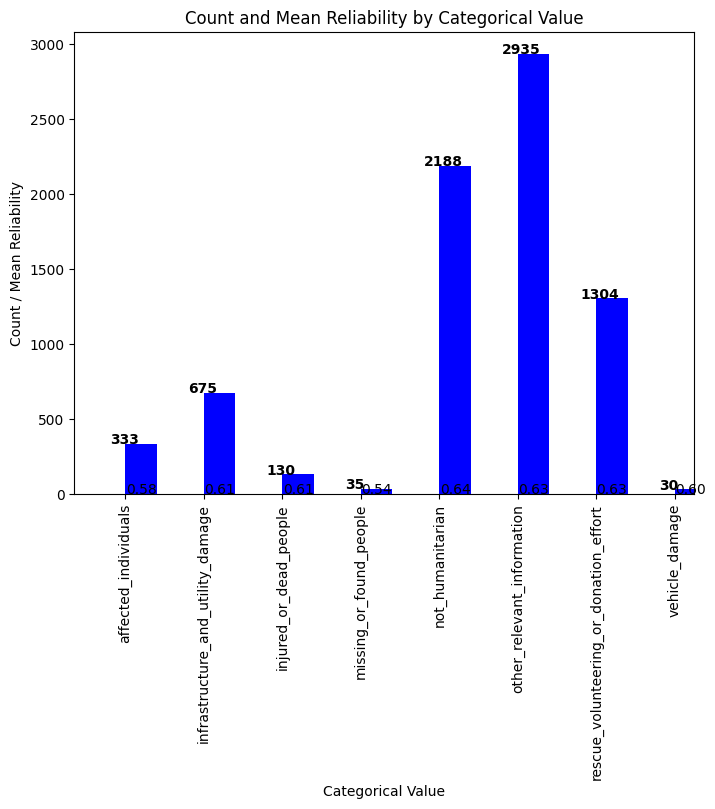

In [96]:
def info_and_human(df):
    
    #se copia la dataframe
    df_info = df.copy()
    df_human = df.copy()

    #se borran los archivos NaN correspondientes
    df_info = df_info[df_info['text_info'].notna()]
    df_info = df_info[df_info['text_info_conf'].notna()]
    df_human = df_human[df_human['text_human'].notna()]
    df_human = df_human[df_human['text_human_conf'].notna()]

    #se reinicia la index si necesario
    df_info.reset_index(inplace=True, drop=True)
    df_human.reset_index(inplace=True, drop=True)

    #se crea nueva id según index
    df_info["new_id"] = df_info.index
    df_human["new_id"] = df_human.index

    
    #se crean dataframes para separar conf=1 con conf<1
    info_confiable = df_info[["new_id", "id", "text_info", "text_info_conf"]].copy()
    info_casi_confiable = df_info[["new_id", "id", "text_info", "text_info_conf"]].copy()

    wanted = []
    not_wanted = []

    i = 0
    while i < info_confiable.shape[0]:
        #print(info_confiable["text_info_conf"][i])
        if info_confiable["text_info_conf"][i] < 1:
            not_wanted.append(info_confiable["new_id"][i])
        else:
            wanted.append(info_confiable["new_id"][i])
        i += 1


    for j in not_wanted:
        info_confiable = info_confiable.drop(info_confiable[info_confiable["new_id"]==j].index)

    for k in wanted:
        info_casi_confiable = info_casi_confiable.drop(info_casi_confiable[info_casi_confiable["new_id"]==k].index)


    #se crean dataframes para separar conf=1 con conf<1
    human_confiable = df_human[["new_id", "id", "text_human", "text_human_conf"]].copy()
    human_casi_confiable = df_human[["new_id", "id", "text_human", "text_human_conf"]].copy()

    hwanted = []
    not_hwanted = []

    i = 0
    while i < human_confiable.shape[0]:
        #print(info_confiable["text_info_conf"][i])
        if human_confiable["text_human_conf"][i] < 1:
            not_hwanted.append(human_confiable["new_id"][i])
        else:
            hwanted.append(human_confiable["new_id"][i])
        i += 1


    for j in not_hwanted:
        human_confiable = human_confiable.drop(human_confiable[human_confiable["new_id"]==j].index)

    for k in hwanted:
        human_casi_confiable = human_casi_confiable.drop(human_casi_confiable[human_casi_confiable["new_id"]==k].index)


    valores_info_confiable = info_confiable["text_info"].value_counts()

    plt.bar(valores_info_confiable.index, valores_info_confiable.values)

    plt.xlabel("")
    plt.ylabel("")
    plt.title("")

    plt.show()

    valores_human_confiable = human_confiable["text_human"].value_counts()

    plt.bar(valores_human_confiable.index, valores_human_confiable.values)

    for i, v in enumerate(valores_human_confiable.values):
        plt.text(i, v + 1, str(v), ha="center")

    plt.xlabel("")
    plt.ylabel("")
    plt.title("")

    plt.xticks(rotation=90)

    plt.show()


    # calculate counts and means
    counts = info_casi_confiable['text_info'].value_counts().sort_index()
    means = info_casi_confiable.groupby('text_info')['text_info_conf'].mean().sort_index()

    # plot the bar chart
    fig, ax = plt.subplots(figsize=(8,6))
    counts.plot(kind='bar', color='blue', width=0.4, position=0, ax=ax)
    means.plot(kind='bar', color='red', width=0.4, position=1, ax=ax)

    # add labels
    ax.set_xlabel('Categorical Value')
    ax.set_ylabel('Count / Mean Reliability')
    ax.set_title('Count and Mean Reliability by Categorical Value')

    # add value labels
    for i, count in enumerate(counts):
        ax.text(i-0.2, count+0.1, str(count), color='black', fontweight='bold')
    for i, mean in enumerate(means):
        ax.text(i+0.2, mean+0.02, f'{mean:.2f}', color='black', ha='center')

    # calculate counts and means
    counts = human_casi_confiable['text_human'].value_counts().sort_index()
    means = human_casi_confiable.groupby('text_human')['text_human_conf'].mean().sort_index()

    # plot the bar chart
    fig, ax = plt.subplots(figsize=(8,6))
    counts.plot(kind='bar', color='blue', width=0.4, position=0, ax=ax)
    means.plot(kind='bar', color='red', width=0.4, position=1, ax=ax)

    # add labels
    ax.set_xlabel('Categorical Value')
    ax.set_ylabel('Count / Mean Reliability')
    ax.set_title('Count and Mean Reliability by Categorical Value')

    # add value labels
    for i, count in enumerate(counts):
        ax.text(i-0.2, count+0.1, str(count), color='black', fontweight='bold')
    for i, mean in enumerate(means):
        ax.text(i+0.2, mean+0.02, f'{mean:.2f}', color='black', ha='center')

info_and_human(df)

In [116]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

text_data = df['text'].str.split().tolist()
all_words = [word.lower() for sublist in text_data for word in sublist]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [113]:
stopwords_en = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word not in stopwords_en]
word_counter = Counter(filtered_words)
top_words = word_counter.most_common(90)  # Puedes ajustar el número de palabras que deseas mostrar


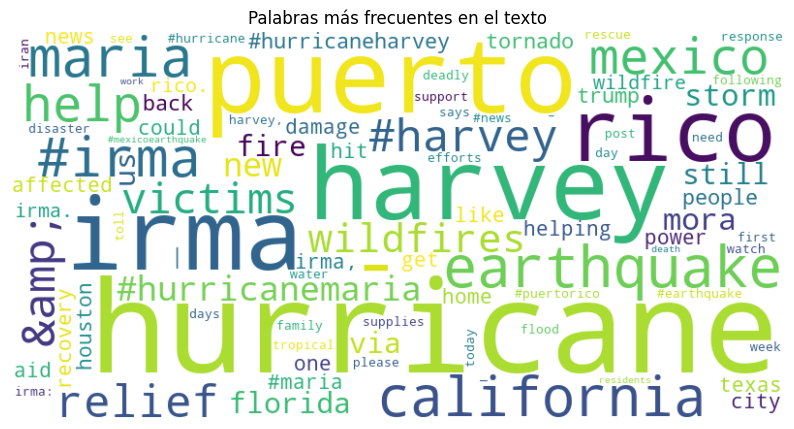

In [114]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más frecuentes en el texto')
plt.show()


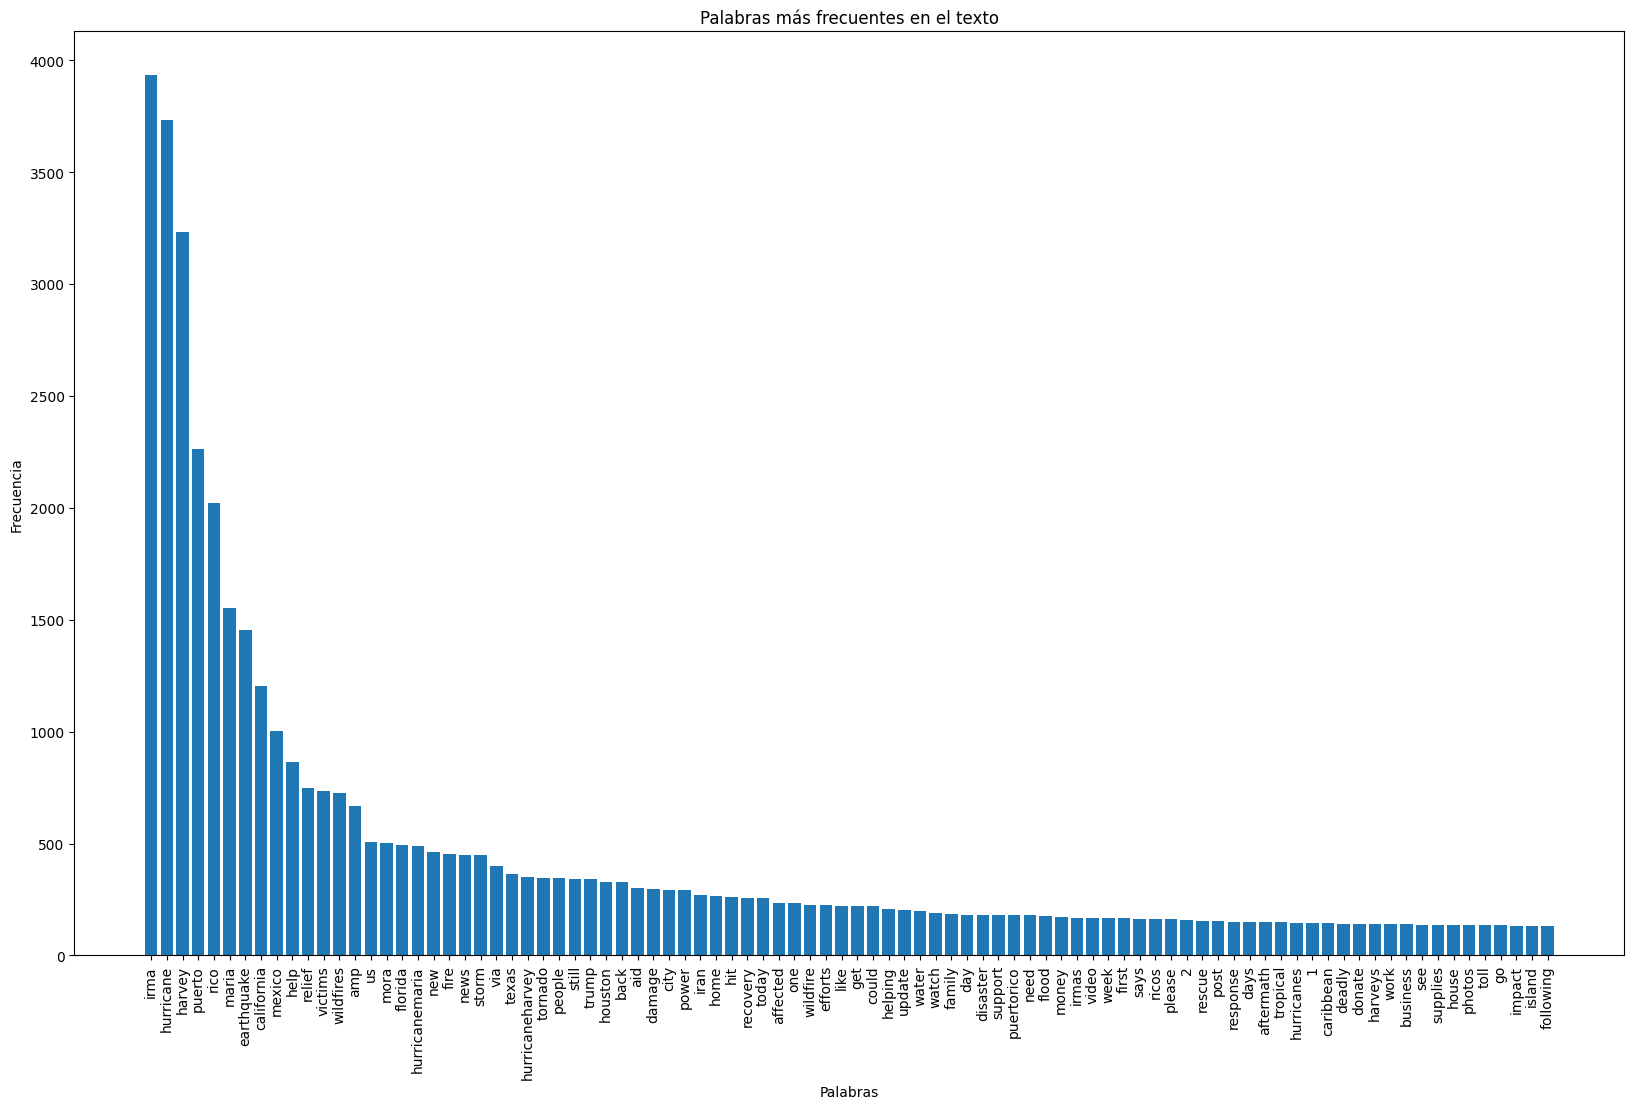

In [120]:

# Obtener las stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para limpiar y tokenizar el texto
def clean_and_tokenize(text):
    # Quitar caracteres especiales y símbolos "#" pegados a las palabras
    text = re.sub(r'[^\w\s]|#(?=\w)', '', text)
    # Tokenizar el texto en palabras
    tokens = word_tokenize(text.lower())
    # Quitar las stopwords
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Obtener las palabras y sus frecuencias en la columna "text"
words = df['text'].apply(clean_and_tokenize).explode()
word_counts = Counter(words)

# Obtener las palabras más frecuentes
top_words = word_counts.most_common(90)

# Crear el gráfico de barras
plt.figure(figsize=(20,12))
plt.bar(*zip(*top_words))
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en el texto')
plt.xticks(rotation=90)
plt.show()


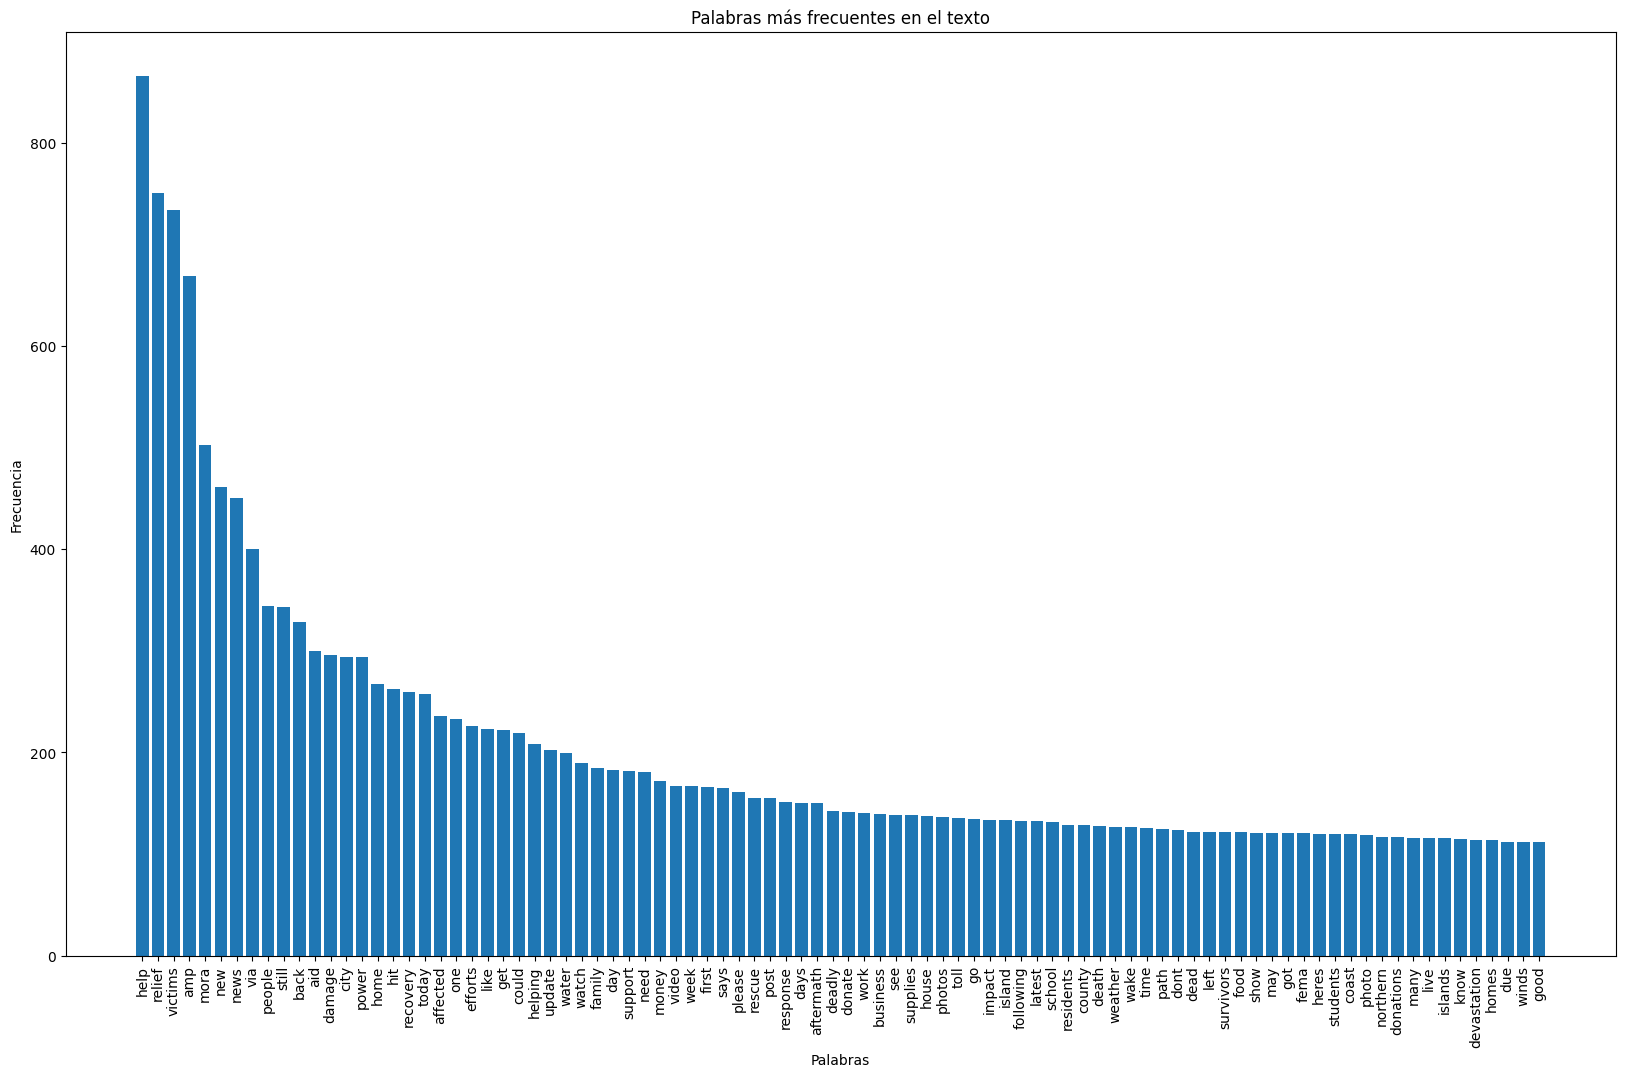

In [127]:

def clean_and_tokenize2(text):
    # Eliminar caracteres especiales y hashtags pegados a palabras
    cleaned_text = re.sub(r"[^\w\s]|(#\w+)", "", text)

    # Tokenizar el texto
    tokens = word_tokenize(cleaned_text.lower())

    # Eliminar stopwords en inglés y palabras adicionales
    stop_words = set(stopwords.words('english'))
    additional_stop_words = ['california', 'wildfires', 'hurricane', 'harvey', 'irma', 'maria', 'iraq', 
     'iran', 'earthquake', 'mexico', 'srilanka', 'floods','puerto','rico','us','texas','florida','texas','hurricanemaria',
     'hurricaneharvey','puertorico','mexicoearthquake','houston','wildfire','ricos','tornado' , 'storm','flood','fire','trump',
     'hurricanes','caribbean','flooding','disaster','irmas','tropical','harveys','st']
    stop_words.update(additional_stop_words)

    # Agregar números a la lista de stopwords
    stop_words.update(additional_stop_words)
    stop_words.update(set(token for token in tokens if token.isdigit()))

    # Filtrar las palabras
    filtered_tokens = [token for token in tokens if token not in stop_words]

    return filtered_tokens

# Obtener las palabras y sus frecuencias en la columna "text"
words = df['text'].apply(clean_and_tokenize2).explode()
word_counts = Counter(words)

# Obtener las palabras más frecuentes
top_words = word_counts.most_common(90)

# Crear el gráfico de barras
plt.figure(figsize=(20,12))
plt.bar(*zip(*top_words))
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en el texto')
plt.xticks(rotation=90)
plt.show()